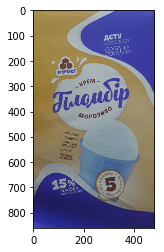

In [127]:
import cv2.cv2 as cv
import numpy as np
import  matplotlib.pyplot as plt

img = cv.imread('../origin/cream_plombir.jpg')
plt.imshow(img)

In [192]:
class AutoRotate():
    
    def __init__(self, img, step=None):
        if step == None:
            self.step = 50
        else:
            self.step = int(step)
        self.img = img
    
    def set_rotate_step(self, step):
        self.step = int(step)
    
    def rotate(self):
        (rows, cols) = self.img.shape[:2]
        for angle in range(0, 360, self.step):
            M = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), angle, 1)
            dst = cv.warpAffine(img,M,(cols,rows))
            cv.imwrite('../dataset/tesla-'+str(angle)+'-.jpeg', dst)

            
class AutoHSV():
    
    default_chages = ('h', 's', 'v')
    
    def __init__(self, img, step=None):
        
        if step == None:
            self.step = 50
        else:
            self.step = int(step)
            
        self.img = img

        
    def increase_brightness(self, value):
        
        img = self.img
        hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
        h, s, v = cv.split(hsv)

        lim = 255 - value
        v[v > lim] = 255
        v[v <= lim] += value

        final_hsv = cv.merge((h, s, v))
        img = cv.cvtColor(final_hsv, cv.COLOR_HSV2RGB)
        path = "../dataset/cream_plombir"+str(value)+".jpeg"
        print(path)
        cv.imwrite(path, img)
        cv.waitKey(0)
    
    def create_images(self):
        for val in range(0, 255, self.step):
            self.increase_brightness(val)

In [193]:
dataset = AutoHSV(img, step=40)
dataset.step

40

In [194]:
dataset.increase_brightness(50)

../dataset/cream_plombir50.jpeg
